In [3]:
#load data  

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
TESLA=read_csv("/Users/home/Downloads/imortant/TSLA.csv")

TESLA.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610858
1,2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960319
2,2015-07-14,262.100006,265.989899,260.510010,265.649994,265.649994,1907641
3,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021621
4,2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1615961


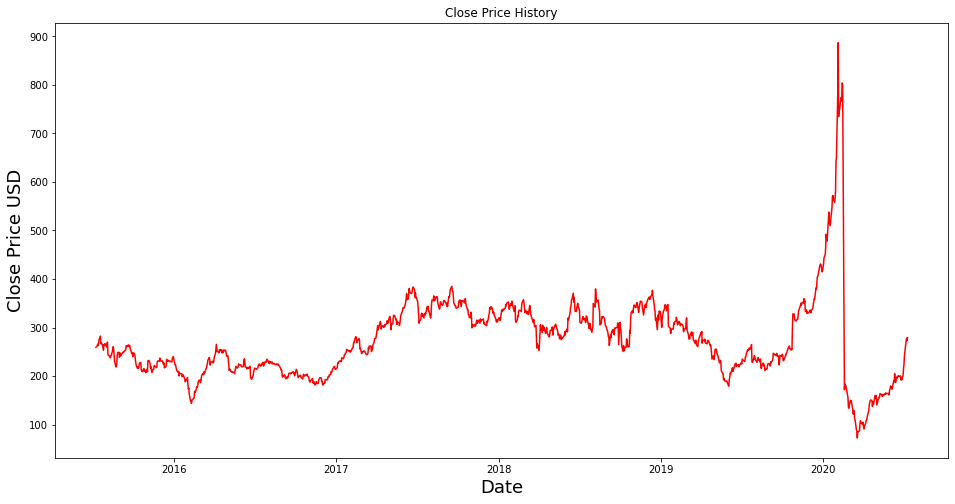

In [5]:

#Visualising the data 
TESLA['Date'] = pd.to_datetime(TESLA['Date'])
TESLA.set_index('Date',inplace=True)
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(TESLA['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [6]:
TESLA=read_csv("/Users/home/Downloads/imortant/TSLA.csv")

In [7]:
## lets see the shape of dataframe to get the rows and columns in the dataframe
print('The Number of colums and rows:', TESLA.shape)
##Lets call the funtion info() to see information of this dataframe
TESLA.info()
TESLA.columns
close = TESLA ['Close'].values

The Number of colums and rows: (1259, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
TESLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,273.014904,278.061707,267.976317,273.260902,273.260902,1.304724e+07
std,84.310873,87.464577,82.558571,85.215450,85.215450,2.186891e+07
min,74.939301,80.972000,70.101997,72.244003,72.244003,0.000000e+00
25%,219.965004,222.802444,216.000000,219.595002,219.595002,4.316168e+06
50%,260.700012,265.399994,255.750000,261.920013,261.920013,6.190835e+06
75%,320.110000,326.695007,315.105011,321.350006,321.350006,9.572088e+06
max,882.960022,968.989929,833.880005,887.059998,887.059998,1.626590e+08


In [9]:
#normalize the data 
from sklearn.preprocessing import MinMaxScaler
close=close.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
close = scaler.fit_transform(close)
# split the data
train_size=int(len (close)*.80)
test_size=len(close)-train_size
train_data=close[0:train_size,:]
test_data=close[train_size:len(close),:1]

In [10]:
#create the function of datasets
import numpy as np
def create_dataset(dateset, time_step):
    x = []
    y = []
    for i in range(len(dateset)-time_step-1):
        a=dateset[i:(i+time_step), 0]
        x.append(a)
        y.append(dateset[i+time_step,0])
    x = np.array(x)
    y = np.array(y)
    return x,y
time_step=30
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

#Reshape the input to be (samples ,time step , features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#build the model lstm
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.summary()

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100,batch_size=32,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [18]:
#prediciton 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
len(predictions)

#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test_scaled)**2)
rmse

8.417372295668653

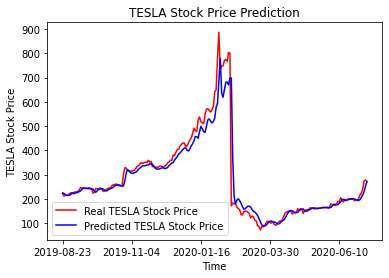

In [19]:
# Visualising the results

plt.plot(TESLA.loc[1038:, 'Date'],y_test_scaled, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(TESLA.loc[1038:, 'Date'],predictions, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,221,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [23]:
# demonstrate prediction for next 10 days
len (x_test)
x_input=test_data[222:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

liste=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        model1 = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,model1))
        temp_input.extend(model1[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        liste.extend(model1.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        model1 = model.predict(x_input, verbose=0)
        print(model1[0])
        temp_input.extend(model1[0].tolist())
        print(len(temp_input))
        liste.extend(model1.tolist())
        i=i+1
    

print(liste)

[0.2463491]
31
1 day input [0.11629128 0.13177944 0.12771962 0.12806326 0.12350274 0.128726
 0.14449887 0.14222843 0.16293985 0.15012468 0.14090543 0.15455758
 0.15240495 0.15477605 0.15776323 0.15701212 0.15539704 0.15722814
 0.14718169 0.15334995 0.14690924 0.15908621 0.17638093 0.1861549
 0.20800769 0.2479971  0.25248398 0.246598   0.25356889 0.2463491 ]
1 day output [[0.24351643]]
2 day input [0.13177944 0.12771962 0.12806326 0.12350274 0.128726   0.14449887
 0.14222843 0.16293985 0.15012468 0.14090543 0.15455758 0.15240495
 0.15477605 0.15776323 0.15701212 0.15539704 0.15722814 0.14718169
 0.15334995 0.14690924 0.15908621 0.17638093 0.1861549  0.20800769
 0.2479971  0.25248398 0.246598   0.25356889 0.2463491  0.24351643]
2 day output [[0.24013293]]
3 day input [0.12771962 0.12806326 0.12350274 0.128726   0.14449887 0.14222843
 0.16293985 0.15012468 0.14090543 0.15455758 0.15240495 0.15477605
 0.15776323 0.15701212 0.15539704 0.15722814 0.14718169 0.15334995
 0.14690924 0.15908621 

In [24]:
1259-30

1229

In [25]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)
import matplotlib.pyplot as plt
print(len(close))

1259


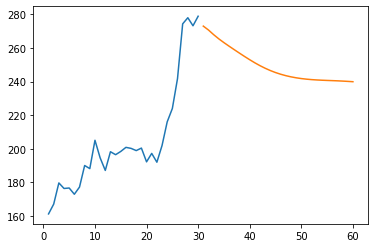

In [27]:
#Visualising the results of prediciton 
plt.plot(day_new,scaler.inverse_transform(close[1229:]))
plt.plot(day_pred,scaler.inverse_transform(liste))

In [48]:
# Print future values 
a=scaler.inverse_transform(liste)
b=a.tolist()
for i in range(1,30):
    if i<21:
        print("le jour ",i+10 ,"juillet 2020 = ", b[i] )
    else:
        print ("le jour ",i-20 ,"aout 2020 = ", b[i] )

le jour  11 juillet 2020 =  [270.66508542013224]
le jour  12 juillet 2020 =  [267.90815357469546]
le jour  13 juillet 2020 =  [265.40233646141377]
le jour  14 juillet 2020 =  [263.14877540050867]
le jour  15 juillet 2020 =  [261.02199801783405]
le jour  16 juillet 2020 =  [258.9516552776049]
le jour  17 juillet 2020 =  [256.90900776530566]
le jour  18 juillet 2020 =  [254.89779512591758]
le jour  19 juillet 2020 =  [252.95861921923796]
le jour  20 juillet 2020 =  [251.1116231330071]
le jour  21 juillet 2020 =  [249.4102182252537]
le jour  22 juillet 2020 =  [247.87769228517968]
le jour  23 juillet 2020 =  [246.51456740607784]
le jour  24 juillet 2020 =  [245.3329731507286]
le jour  25 juillet 2020 =  [244.32343898963373]
le jour  26 juillet 2020 =  [243.47428460307884]
le jour  27 juillet 2020 =  [242.7729918937401]
le jour  28 juillet 2020 =  [242.20384949601416]
le jour  29 juillet 2020 =  [241.74784350067776]
le jour  30 juillet 2020 =  [241.3963290141377]
le jour  1 aout 2020 =  [2